In [4]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [5]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [6]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

rovi = df[df['empresa'] == 'Laboratorios Rovi']

rovi.shape

(1325, 10)

In [7]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

rovi = rovi [['date','open','high','low','close','adj close']]

rovi.shape

(1325, 6)

In [8]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

rovi['date'] = pd.to_datetime(rovi['date'], format="%Y-%m-%d")

rovi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 37380 to 38704
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [9]:
# Paso 5: Ordenar el DF por fecha

rovi.sort_values(by='date',ascending= True, inplace=True)

rovi.head()

,date,open,high,low,close,adj close
37382,2019-01-02,17.799999,17.799999,17.200001,17.299999,15.988617
37380,2019-01-03,17.750000,17.750000,17.299999,17.750000,16.404505
37383,2019-01-04,17.500000,18.000000,17.250000,18.000000,16.635555
37945,2019-01-07,18.049999,18.299999,17.850000,18.100000,16.727976
37385,2019-01-08,18.450001,18.500000,18.150000,18.350000,16.959023


In [10]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

rovi = rovi[(rovi['date'] >= fecha_inicio) & (rovi['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

rovi.shape

(812, 6)

In [11]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=rovi['date'].min(), end=rovi['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

rovi = rovi.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

rovi = rovi.rename(columns={'index': 'date'})


In [12]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

rovi.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,38.500000,38.500000,38.099998,38.299999,35.698017
1,2021-01-05,38.099998,39.400002,38.000000,39.099998,36.443672
2,2021-01-06,39.000000,41.099998,38.900002,40.799999,38.028179
3,2021-01-07,42.000000,43.799999,41.400002,42.000000,39.146656
4,2021-01-08,42.500000,42.500000,41.299999,41.599998,38.773830
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,41.200001,43.200001,41.200001,43.000000,40.078720
8,2021-01-12,43.599998,43.599998,42.299999,42.799999,39.892307
9,2021-01-13,42.799999,43.400002,42.400002,43.099998,40.171921


In [13]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

rovi = rovi.fillna(method='ffill')

In [14]:
# Paso 10: Comprobar que se han introducido los valores correctamente


rovi.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,38.500000,38.500000,38.099998,38.299999,35.698017
1,2021-01-05,38.099998,39.400002,38.000000,39.099998,36.443672
2,2021-01-06,39.000000,41.099998,38.900002,40.799999,38.028179
3,2021-01-07,42.000000,43.799999,41.400002,42.000000,39.146656
4,2021-01-08,42.500000,42.500000,41.299999,41.599998,38.773830
5,2021-01-09,42.500000,42.500000,41.299999,41.599998,38.773830
6,2021-01-10,42.500000,42.500000,41.299999,41.599998,38.773830
7,2021-01-11,41.200001,43.200001,41.200001,43.000000,40.078720
8,2021-01-12,43.599998,43.599998,42.299999,42.799999,39.892307
9,2021-01-13,42.799999,43.400002,42.400002,43.099998,40.171921


In [15]:
# Paso 11: Establecer columna 'date' como índice para modelo

rovi = rovi.set_index('date')

rovi.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,38.500000,38.500000,38.099998,38.299999,35.698017
2021-01-05,38.099998,39.400002,38.000000,39.099998,36.443672
2021-01-06,39.000000,41.099998,38.900002,40.799999,38.028179
2021-01-07,42.000000,43.799999,41.400002,42.000000,39.146656
2021-01-08,42.500000,42.500000,41.299999,41.599998,38.773830
2021-01-09,42.500000,42.500000,41.299999,41.599998,38.773830
2021-01-10,42.500000,42.500000,41.299999,41.599998,38.773830
2021-01-11,41.200001,43.200001,41.200001,43.000000,40.078720
2021-01-12,43.599998,43.599998,42.299999,42.799999,39.892307


In [16]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

rovi.index = pd.DatetimeIndex(rovi.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

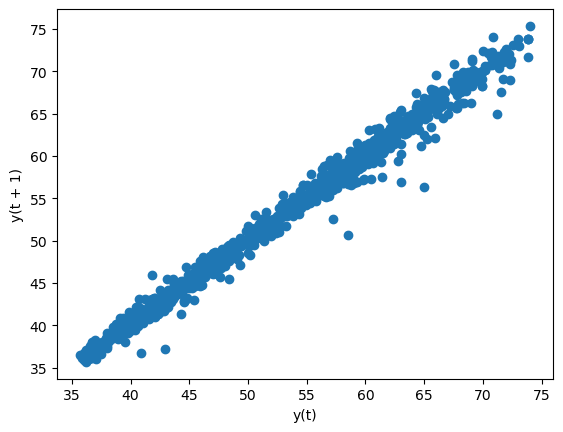

In [17]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(rovi.close)

In [18]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [19]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = rovi.close[:-10], rovi.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [20]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [21]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(rovi.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    70.698510
2024-02-22    70.647241
2024-02-23    70.596193
2024-02-24    70.545364
2024-02-25    70.494753
2024-02-26    70.444360
2024-02-27    70.394184
2024-02-28    70.344223
2024-02-29    70.294477
2024-03-01    70.244944
Freq: D, dtype: float64

In [22]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    70.699997
2024-02-22    71.699997
2024-02-23    71.050003
2024-02-24    71.050003
2024-02-25    71.050003
2024-02-26    71.500000
2024-02-27    67.500000
2024-02-28    70.900002
2024-02-29    74.050003
2024-03-01    75.349998
Freq: D, Name: close, dtype: float64

In [23]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

1.593412351479691

In [24]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,70.699997,70.698510,-0.001487
2024-02-22,71.699997,70.647241,-1.052756
2024-02-23,71.050003,70.596193,-0.453810
2024-02-24,71.050003,70.545364,-0.504639
2024-02-25,71.050003,70.494753,-0.555250
2024-02-26,71.500000,70.444360,-1.055640
2024-02-27,67.500000,70.394184,2.894184
2024-02-28,70.900002,70.344223,-0.555779
2024-02-29,74.050003,70.294477,-3.755526
2024-03-01,75.349998,70.244944,-5.105054
